In [3]:
import pandas as pd
import numpy as np

import xgboost as xgb
xgb.set_config(verbosity = 0)

In [5]:
!unzip '/content/drive/MyDrive/Colab Notebooks/data/ex.csv.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/data/ex.csv.zip
  inflating: exoplanets.csv          
   creating: __MACOSX/
  inflating: __MACOSX/._exoplanets.csv  


In [29]:
df = pd.read_csv('exoplanets.csv')
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [8]:
np.unique(df['LABEL'],return_counts=True)

(array([1, 2]), array([5050,   37]))

In [10]:
df['LABEL'].value_counts() / len(df)

1    0.992727
2    0.007273
Name: LABEL, dtype: float64

셈플링 편향

In [12]:
x = df.iloc[:, 1: ]
y = df.iloc[:,0]-1

In [24]:
x.iloc[0]

FLUX.1       93.85
FLUX.2       83.81
FLUX.3       20.10
FLUX.4      -26.98
FLUX.5      -39.56
             ...  
FLUX.3193    92.54
FLUX.3194    39.32
FLUX.3195    61.42
FLUX.3196     5.08
FLUX.3197   -39.54
Name: 0, Length: 3197, dtype: float64

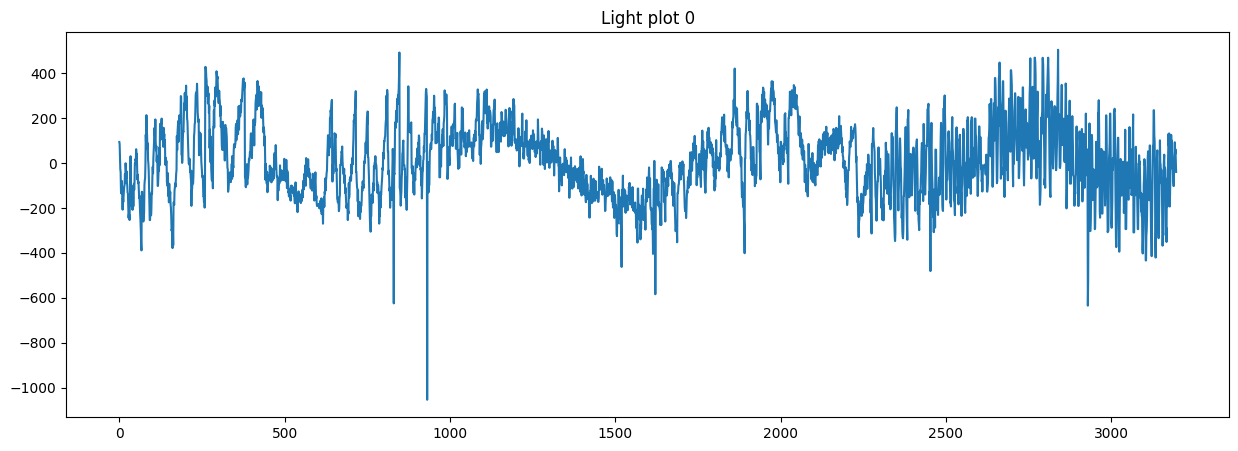

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
y_data = x.iloc[0]
x_data = np.arange(len(y_data))
plt.plot(x_data,y_data)
plt.title('Light plot ' + str(0))
plt.show()

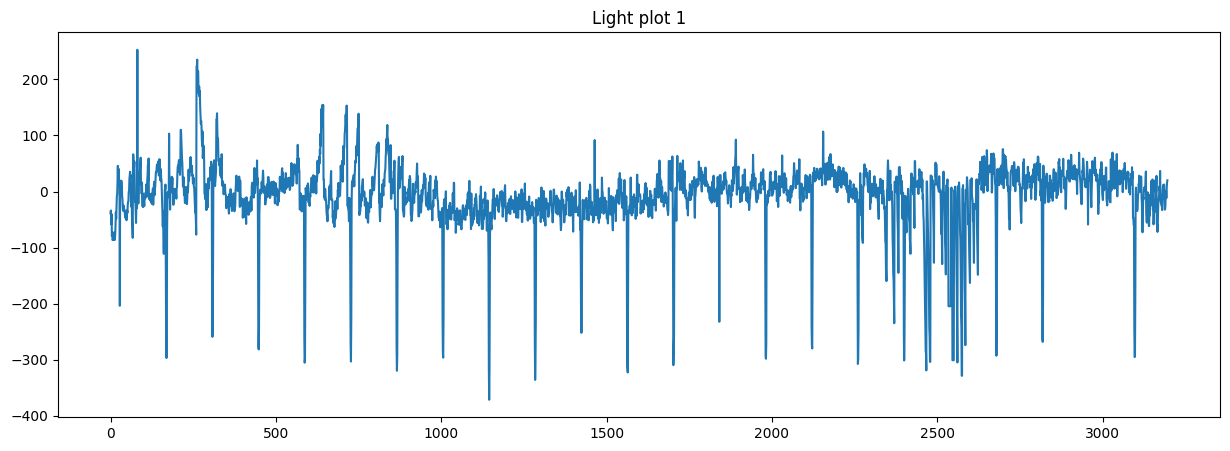

In [27]:
plt.figure(figsize=(15,5))
y_data = x.iloc[1]
x_data = np.arange(len(y_data))
plt.plot(x_data,y_data)
plt.title('Light plot ' + str(1))
plt.show()

In [31]:
df.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LABEL   5087 non-null   int64  
 1   FLUX.1  5087 non-null   float64
 2   FLUX.2  5087 non-null   float64
 3   FLUX.3  5087 non-null   float64
 4   FLUX.4  5087 non-null   float64
 5   FLUX.5  5087 non-null   float64
 6   FLUX.6  5087 non-null   float64
 7   FLUX.7  5087 non-null   float64
 8   FLUX.8  5087 non-null   float64
 9   FLUX.9  5087 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 397.5 KB


In [34]:
df.columns[df.isna().sum() > 0]

Index([], dtype='object')

데이터 준비
  - EDA
    - 결측치, 이상치, 피처공학

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 100)

모델 준비

In [40]:
model =  xgb.XGBClassifier(booster='gbtree')

In [41]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred, y_test)

0.9929245283018868

정확성
  - 분류모델의 학습데이터의 target이 편차가 심하면 성능은 거의 1에 가깝게 나타남어느 모들을 사용하던지..
  - 왜 그럴까?
    - 정상인 데이터가 10000개이고 환자가 10명이면? 
    - 모두 정상으로 예측하는 모델이면 성능이 뛰어날까?

confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1263,    0],
       [   9,    0]])

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1263
           1       0.00      0.00      0.00         9

    accuracy                           0.99      1272
   macro avg       0.50      0.50      0.50      1272
weighted avg       0.99      0.99      0.99      1272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


언더샘플링

In [49]:
df = pd.read_csv('exoplanets.csv')
print(df['LABEL'].value_counts() / len(df))
df = pd.read_csv('exoplanets.csv',nrows=800)
print(df['LABEL'].value_counts() / len(df))

1    0.992727
2    0.007273
Name: LABEL, dtype: float64
1    0.95375
2    0.04625
Name: LABEL, dtype: float64


In [50]:
# 데이터 나누고
# 학습하고
# 예측하고
# confusion matrix를 쉽게 classification_report

In [56]:
def undersampling(nrows = 100):
  df = pd.read_csv('exoplanets.csv',nrows=nrows)
  print(df['LABEL'].value_counts() / len(df)*100  )
  x = df.iloc[:,1:]
  y = df.iloc[:,0]-1
  x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 100)
  model =  xgb.XGBClassifier(booster='gbtree')
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(classification_report(y_test,y_pred))

In [61]:
undersampling(230)

1    83.913043
2    16.086957
Name: LABEL, dtype: float64
              precision    recall  f1-score   support

           0       0.82      0.98      0.89        47
           1       0.50      0.09      0.15        11

    accuracy                           0.81        58
   macro avg       0.66      0.53      0.52        58
weighted avg       0.76      0.81      0.75        58



오버샘플링

In [68]:
x_train.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
40,-167.02,-137.65,-150.05,-136.85,-98.73,-103.14,-107.70,-123.19,-125.65,-119.86,...,-97.43,-79.79,-80.62,-78.22,-105.06,-69.67,-90.45,-73.67,-66.71,-66.07
153,131.47,132.16,146.07,153.65,169.92,193.40,201.00,226.67,246.20,236.07,...,-308.46,-336.08,-337.85,-338.41,-331.83,-360.72,-153.59,-153.84,-156.70,-182.87
115,337.72,326.33,314.72,275.38,213.66,85.10,10.14,-194.95,-296.64,-333.54,...,178.24,232.75,273.50,276.42,195.66,335.71,6.82,121.47,159.78,209.89
64,-62.16,-71.80,-55.41,-64.32,-61.33,-50.92,-54.66,-52.70,-51.80,114.82,...,23.19,30.50,37.79,43.23,46.22,49.91,-3.94,9.85,24.13,15.96
59,-42.97,-127.45,-101.61,-98.31,-71.39,-71.73,-84.81,-68.61,-91.84,-78.36,...,23.75,27.24,96.92,68.44,65.11,74.55,-22.14,-103.64,-51.87,-65.28


In [69]:
x_test.head()

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
126,-1490.57,-1249.69,-1304.04,-1103.11,-999.17,-1055.01,-796.00,-716.53,-737.63,-699.20,...,-363.61,-295.25,147.69,8.41,-19.53,-385.80,-275.92,-613.75,-526.00,-536.39
104,-489.56,-548.25,-513.43,-477.69,-382.56,-439.62,-356.56,-326.37,-286.06,-186.62,...,-425.50,-495.56,-357.69,-298.19,-189.31,-30.75,-495.43,-641.62,-631.87,-497.93
99,-165.04,-168.18,-206.71,-215.09,-226.62,-195.51,-150.17,-79.00,-37.79,-46.39,...,-89.60,-36.67,10.08,29.11,33.00,1.21,104.22,97.35,104.94,97.55
92,17.35,14.90,27.79,21.55,-6.96,17.10,16.10,17.23,-2.36,15.25,...,-30.71,-24.83,-11.61,-36.57,-36.58,-26.36,13.06,4.82,6.31,30.46
111,-482.41,-437.10,-391.07,-375.39,-341.49,-325.28,-273.60,-188.92,-164.53,-80.89,...,128.54,147.00,184.80,185.72,181.36,146.14,-43.96,-7.14,0.89,45.78


In [76]:
df = pd.read_csv('exoplanets.csv')
x = df.iloc[:,1:]
y = df.iloc[:,0]-1
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 100)
train_df = pd.merge(y_train,x_train,left_index=True, right_index=True)

In [80]:
train_df['LABEL'].value_counts()

0    3787
1      28
Name: LABEL, dtype: int64

In [95]:
newdf = pd.DataFrame(np.repeat(train_df[train_df['LABEL'] == 1].values,10,axis=0))
newdf.columns = df.columns


temp = train_df[train_df['LABEL'] == 0]
temp = temp.iloc[: int(len(temp)*0.1)  ]

# 학습용으로 분리한 데이터 + 정답 --> 적은빈도를 보이는 라벨데이터를 증폭한 데이터와 합친다.
df_train_resample = pd.concat([temp,newdf])
df_train_resample['LABEL'].value_counts()


0.0    378
1.0    280
Name: LABEL, dtype: int64

In [96]:
  x = df_train_resample.iloc[:,1:]
  y = df_train_resample.iloc[:,0]
  x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 100)
  model =  xgb.XGBClassifier(booster='gbtree')
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        97
         1.0       0.97      1.00      0.99        68

    accuracy                           0.99       165
   macro avg       0.99      0.99      0.99       165
weighted avg       0.99      0.99      0.99       165



가중치 조정
  - xgb계열은 클래스 불균형 문제에 대응하기 위해 가중치를 조정하는 파라메털를 가지고 있음
  - scale_pos_weight 의 값을 주면.. 양성클래스(positive class)데 대한 가중치를 조정, 이 값을 조정하면 양성클래스를 잘 식별하도록 가중치를 높인다

In [97]:
xgb.XGBClassifier(scale_pos_weight=10)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [99]:
df = pd.read_csv('exoplanets.csv')
df['LABEL'] = df['LABEL'].replace(1,0)
df['LABEL'] = df['LABEL'].replace(2,1)
df['LABEL'].value_counts()

0    5050
1      37
Name: LABEL, dtype: int64

In [100]:
x, y = df.iloc[:, 1:], df.iloc[:, 0]
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=45)

In [107]:
model = xgb.XGBClassifier(scale_pos_weight = 10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1263
           1       1.00      0.11      0.20         9

    accuracy                           0.99      1272
   macro avg       1.00      0.56      0.60      1272
weighted avg       0.99      0.99      0.99      1272



In [110]:
accuracy_score(y_test,y_pred)

0.9937106918238994

In [113]:
# accuracy_score(y_train,model.predict(x_train))
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)

In [114]:
accuracy_score(y_train,y_train_pred)

1.0

가중치 계산

In [119]:
from sklearn.utils.class_weight import compute_class_weight
class_weight = compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)
class_weight

array([ 0.50369686, 68.125     ])

In [123]:
from sklearn.linear_model import LogisticRegression
print(dict(enumerate(class_weight)))
LogisticRegression(class_weight = dict(enumerate(class_weight)))

{0: 0.5036968576709797, 1: 68.125}


LogisticRegression(class_weight={0: 0.5036968576709797, 1: 68.125})